# Plot ApRES melt rates accross the channel profile at KIS2

see DATA/Jupyter/APRES/02_ApRES_.ipynb for meltrate processing which gives kis2_meltrates.csv

# APRES BED IS ACTUALLY ICE THICKNESS

In [2]:
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate

from shapely.geometry import LineString


import rasterio as rio
import rasterio.mask
import matplotlib as mpl
import pickle


In [67]:
# df = pd.read_csv('/Users/home/whitefar/DATA/ApRES/kis2_meltrates_matlab.csv')
df = pd.read_csv('/Users/home/whitefar/DATA/ApRES/kis2_meltrates.csv')
# df.rename(columns={'bed':'ice_thickn'},inplace=True)
df['meltRate'] = df.meltRate_v_Epoch1
# df = df.sort_values('x')
# points = [Point(xy) for xy in zip(df.x,df.y) ]
# gdf = gpd.GeoDataFrame(df,geometry=points,crs=3031)

In [68]:
df.keys()

Index(['Date', 'utc_time', 'lat', 'lon', 'Approx_Depth', 'File_Name',
       'AF_Gain', 'Stacks', 'RF_Atten', 'Site_ID', 'Notes', 'APRES_unit',
       'Epoch', 'meltRate', 'meltRateError', 'bed', 'dhStrain', 'dheStrain',
       'cross_channel', 'down_channel', 'x', 'y', 'meltRate_v_Epoch1',
       'migrated_res_thickness_at_apres_sites'],
      dtype='object')

In [69]:
gdfcc = df.query('(Epoch == 3) & cross_channel')
gdfdc = df.query('(Epoch == 3) & down_channel')
gdfcc2 = df.query('(Epoch == 2) & cross_channel')

In [70]:
gdfcc.reset_index(drop=True,inplace=True)
gdfdc.reset_index(drop=True,inplace=True)
gdfcc2.reset_index(drop=True,inplace=True)

In [71]:
df.keys()

Index(['Date', 'utc_time', 'lat', 'lon', 'Approx_Depth', 'File_Name',
       'AF_Gain', 'Stacks', 'RF_Atten', 'Site_ID', 'Notes', 'APRES_unit',
       'Epoch', 'meltRate', 'meltRateError', 'bed', 'dhStrain', 'dheStrain',
       'cross_channel', 'down_channel', 'x', 'y', 'meltRate_v_Epoch1',
       'migrated_res_thickness_at_apres_sites'],
      dtype='object')

In [72]:
res_bed_cross = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp').query('line_name == "lineAPREScross"')
res_bed_down = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp').query('line_name == "lineAPRESdown"')                                                                                                              
                                                                                                              

In [73]:
resthickncross = interpolate.interp1d(res_bed_cross.x,res_bed_cross.ice_thickn)


In [74]:
# get RES points where ApRES is

RES_at_apres = resthickncross(gdfcc.x)
REScc = pd.DataFrame({'ice_thickn':RES_at_apres,'x':gdfcc.x,'y':gdfcc.y})

In [75]:
gdfcc.rename(columns={'bed':'ice_thickn_prefirncorrection'},inplace=True)

In [76]:
gdfcc.loc[:,'bed'] = gdfcc.ice_thickn_prefirncorrection-7 #thickness is +7

In [77]:
gdfcc.loc[:,'bed']

0     701.933784
1     707.741797
2     710.465693
3     710.745032
4     607.557531
5     447.561588
6     455.810647
7     562.220662
8     708.012616
9     712.068803
10    710.952208
11    622.843121
12    541.350047
13    426.136586
14    515.197305
Name: bed, dtype: float64

In [45]:
diffRES_APRES = gdfcc.bed - REScc.ice_thickn

In [122]:
diffRES_APRES

0       5.070851
1       6.675130
2       6.876807
3       6.315410
4     -93.509136
5    -240.893739
6     -53.502225
7    -130.438491
8       7.786692
9       7.639181
10      8.204060
11    -74.019812
12      4.272873
13     11.098987
14     -7.577642
Name: ice_thickn, dtype: float64

In [113]:
# SORT X
gdfcc.sort_values(by=['x'],inplace=True)
REScc.sort_values(by=['x'],inplace=True)

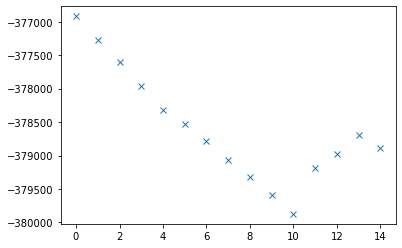

In [126]:
plt.plot( gdfcc.x,'x')

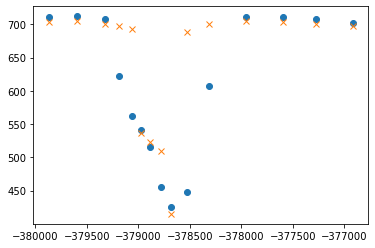

In [127]:
plt.plot( gdfcc.x,gdfcc.bed,'o' )
plt.plot(  REScc.x,REScc.ice_thickn,'x')


In [132]:
diffRES_APRES = gdfcc.loc[[0,1,2,3,8,9,10],:].bed - REScc.loc[[0,1,2,3,8,9,10],:].ice_thickn

(array([1., 0., 0., 1., 0., 2., 0., 0., 2., 1.]),
 array([5.07085072, 5.38417163, 5.69749254, 6.01081346, 6.32413437,
        6.63745528, 6.9507762 , 7.26409711, 7.57741803, 7.89073894,
        8.20405985]),
 <BarContainer object of 10 artists>)

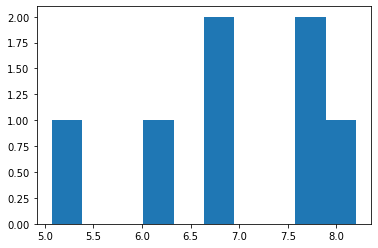

In [133]:
plt.hist(diffRES_APRES)

In [134]:
diffRES_APRES.mean()

6.938304446619213

# This value is fed into DATA/Jupyter/PLOTS/data_paper/global_corrections.ipynb